In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
#Data Loading
data = np.genfromtxt('sgd_data.txt',delimiter = ',')
x = np.zeros((40,1), dtype = np.float)
y = np.zeros((40,1), dtype = np.float)
for i in range(data.shape[0]):
    x[i] = data[i][0]
for i in range(data.shape[0]):
    y[i] = data[i][1]
print("Input data shape = {}".format(x.shape))
print("Output data shape = {}".format(y.shape))

Input data shape = (40, 1)
Output data shape = (40, 1)


In [3]:
#Helper Functions
def f(x,w,b):
    '''Sigmoid Function'''
    f = 1/(1+np.exp(-(w*x+b)))
    return f
def mse(x,y,w,b):
    '''Mean Squared Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += 0.5*(y[i]-f(x[i],w,b))**2
    return L
def cross_entropy(x,y,w,b):
    '''Cross Entropy Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += -(y[i]*np.log(f(x[i],w,b)))
    return L
def grad_w_mse(x,y,w,b):
    fx = f(x,w,b) 
    dw = (fx - y)*fx*(1-fx)*x
    return dw
def grad_b_mse(x,y,w,b):
    fx = f(x,w,b) 
    db = (fx - y)*fx*(1-fx)
    return db
def grad_w_cross(x,y,w,b):
    fx = f(x,w,b) 
    dw = (- y)*(1-fx)*x
    return dw
def grad_b_cross(x,y,w,b):
    fx = f(x,w,b) 
    db = (- y)*(1-fx)
    return db

In [6]:
#Gradient Discent
def Adagrad(x,y,epochs,batch_size,loss,lr):
    w = np.random.randn()
    b = np.random.randn()
    epsilon = 0.5
    update_w, update_b = 0,0
    l_list = []
    w_list = []
    b_list = []
    points = 0
    ep = [i for i in range(epochs+1)]
    dw,db = 0,0
    for i in range(epochs+1):
        dw,db = 0,0
        for j in range(x.shape[0]):
            if (loss == 'mse'):
                dw += grad_w_mse(x[j],y[j],w,b)
                db += grad_b_mse(x[j],y[j],w,b)
            elif (loss == 'cross_entropy'):
                dw += grad_w_cross(x[j],y[j],w,b)
                db += grad_b_cross(x[j],y[j],w,b)
            points += 1
            if(points % batch_size == 0):
                update_w += dw**2
                update_b += db**2
                w = w - (lr/np.sqrt(update_w + epsilon))*dw
                b = b - (lr/np.sqrt(update_b + epsilon))*db
                dw,db = 0,0
        if (loss == 'mse'):
            print('Loss after {}th epoch = {}\n'.format(i,mse(x,y,w,b)[0]))
            l_list.append(mse(x,y,w,b)[0])
        elif (loss == 'cross_entropy'):
            print('Loss after {}th epoch = {}\n'.format(i,cross_entropy(x,y,w,b)[0]))
            l_list.append(cross_entropy(x,y,w,b)[0])
        w_list.append(w[0])
        b_list.append(b[0])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch Curve\nAlgotithm :Mini Batch Adagrad\nBatch Size = {}\nInitial Learning Rate = {}\nLoss Function = {}'.format(batch_size,lr,loss))
    plt.plot(ep,l_list)
    plt.show()
    return w_list,b_list

Loss after 0th epoch = 0.923428064342264

Loss after 1th epoch = 0.85278554299011

Loss after 2th epoch = 0.8033218699237721

Loss after 3th epoch = 0.7649224941200982

Loss after 4th epoch = 0.7334500208636201

Loss after 5th epoch = 0.7067631582783294

Loss after 6th epoch = 0.6835968981849786

Loss after 7th epoch = 0.6631366681479396

Loss after 8th epoch = 0.6448249562160071

Loss after 9th epoch = 0.6282623776049967

Loss after 10th epoch = 0.6131524870789825

Loss after 11th epoch = 0.5992688965533706

Loss after 12th epoch = 0.5864346360147435

Loss after 13th epoch = 0.5745086403364901

Loss after 14th epoch = 0.563376586559772

Loss after 15th epoch = 0.5529444949973471

Loss after 16th epoch = 0.5431341463035568

Loss after 17th epoch = 0.5338797266952718

Loss after 18th epoch = 0.5251253248704327

Loss after 19th epoch = 0.5168230326868001

Loss after 20th epoch = 0.5089314822384173

Loss after 21th epoch = 0.501414703867075

Loss after 22th epoch = 0.49424122388659936

Lo

Loss after 463th epoch = 0.11995731943331202

Loss after 464th epoch = 0.11980423783516554

Loss after 465th epoch = 0.11965165400730948

Loss after 466th epoch = 0.11949956535379312

Loss after 467th epoch = 0.11934796929722859

Loss after 468th epoch = 0.11919686327862254

Loss after 469th epoch = 0.11904624475720793

Loss after 470th epoch = 0.11889611121027856

Loss after 471th epoch = 0.11874646013302552

Loss after 472th epoch = 0.11859728903837478

Loss after 473th epoch = 0.11844859545682737

Loss after 474th epoch = 0.11830037693630066

Loss after 475th epoch = 0.11815263104197166

Loss after 476th epoch = 0.1180053553561224

Loss after 477th epoch = 0.11785854747798631

Loss after 478th epoch = 0.11771220502359661

Loss after 479th epoch = 0.1175663256256367

Loss after 480th epoch = 0.11742090693329135

Loss after 481th epoch = 0.11727594661210025

Loss after 482th epoch = 0.11713144234381301

Loss after 483th epoch = 0.11698739182624544

Loss after 484th epoch = 0.116843792

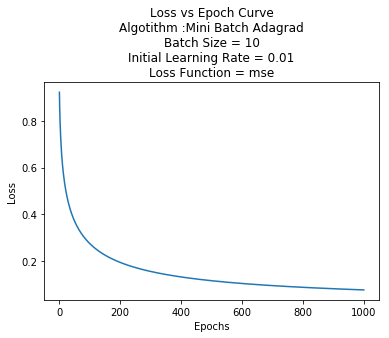

In [8]:
W,B = Adagrad(x,y,1000,10,'mse',0.01)

In [9]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[0.23373998823756814, 0.24673759387493843, 0.25664805062933199, 0.26487350426051853, 0.27200379614308706, 0.27835173460654672, 0.28410630847515916, 0.28939179555639982, 0.29429495885498735, 0.29887913509833841, 0.30319218853741425, 0.30727130544161374, 0.31114603760387383, 0.31484031706983046, 0.3183738369622891, 0.32176302593441586, 0.32502175324151306, 0.32816185003849491, 0.33119350214263044, 0.33412555091375296, 0.33696572717409018, 0.33972083548542109, 0.34239690105222786, 0.34499928809482439, 0.34753279616849891, 0.35000173923874645, 0.35241001113194032, 0.35476114011737442, 0.35705833474220688, 0.35930452256899931, 0.36150238311065591, 0.36365437598785155, 0.3657627651270598, 0.3678296396570252, 0.36985693203638287, 0.37184643384663618, 0.37379980960661841, 0.37571860890222225, 0.37760427707508643, 0.37945816467342269, 0.3812815358352275, 0.38307557574718243, 0.38484139730040823, 0.38658004704593985, 0.3882925105376116, 0.38997971713737861, 0.39164254434750501, 0.

Loss after 0th epoch = 49.617099316556676

Loss after 1th epoch = 46.56654705445505

Loss after 2th epoch = 44.23969394137571

Loss after 3th epoch = 42.29914876498429

Loss after 4th epoch = 40.610694075274296

Loss after 5th epoch = 39.104534955321625

Loss after 6th epoch = 37.73882723142982

Loss after 7th epoch = 36.486115350791145

Loss after 8th epoch = 35.32721452129078

Loss after 9th epoch = 34.2480783448218

Loss after 10th epoch = 33.238043232126046

Loss after 11th epoch = 32.28877504124097

Loss after 12th epoch = 31.393602415306184

Loss after 13th epoch = 30.54707634849781

Loss after 14th epoch = 29.74466875958412

Loss after 15th epoch = 28.982560026632918

Loss after 16th epoch = 28.257485440851756

Loss after 17th epoch = 27.566621842949477

Loss after 18th epoch = 26.907502366031537

Loss after 19th epoch = 26.27795127631454

Loss after 20th epoch = 25.67603346535388

Loss after 21th epoch = 25.10001480678564

Loss after 22th epoch = 24.54833069163267

Loss after 2

Loss after 382th epoch = 4.6340396060789315

Loss after 383th epoch = 4.628004177469734

Loss after 384th epoch = 4.621993809121395

Loss after 385th epoch = 4.616008323749608

Loss after 386th epoch = 4.610047545818428

Loss after 387th epoch = 4.6041113015183175

Loss after 388th epoch = 4.598199418744523

Loss after 389th epoch = 4.592311727075771

Loss after 390th epoch = 4.58644805775329

Loss after 391th epoch = 4.580608243660166

Loss after 392th epoch = 4.574792119300972

Loss after 393th epoch = 4.5689995207817375

Loss after 394th epoch = 4.563230285790198

Loss after 395th epoch = 4.55748425357635

Loss after 396th epoch = 4.551761264933285

Loss after 397th epoch = 4.546061162178316

Loss after 398th epoch = 4.540383789134386

Loss after 399th epoch = 4.534728991111736

Loss after 400th epoch = 4.529096614889862

Loss after 401th epoch = 4.523486508699722

Loss after 402th epoch = 4.517898522206213

Loss after 403th epoch = 4.512332506490901

Loss after 404th epoch = 4.5067

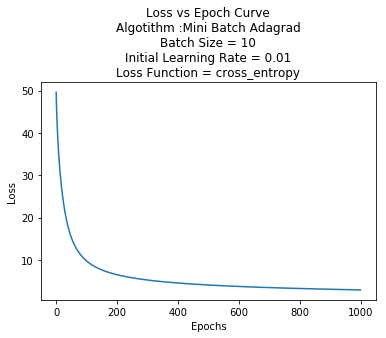

In [13]:
W,B = Adagrad(x,y,1000,10,'cross_entropy',0.01)

In [14]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[-0.17013968918465816, -0.15439748337607637, -0.14225604988182836, -0.13202491019262486, -0.123032383804917, -0.1149296514625735, -0.10750790140437472, -0.1006303699308997, -0.09420169990046029, -0.088152258943371031, -0.082429353476504208, -0.07699195837669362, -0.071807381798315181, -0.066849061585391945, -0.062095056683060305, -0.057526983129215101, -0.053129244367905705, -0.048888462216732501, -0.044793048152199623, -0.040832874924845754, -0.036999021330885007, -0.033283571261984571, -0.029679453655990128, -0.026180313699859285, -0.022780408212870536, -0.019474519950835097, -0.016257886867865095, -0.013126143312372447, -0.010075270825350648, -0.0071015567238572035, -0.0042015590405152558, -0.0013720766852728023, 0.0013898760770803377, 0.0040870915636639794, 0.0067221876163175926, 0.0092976240330939035, 0.011815716884202075, 0.014278651038572562, 0.01668849117109553, 0.019047191475061433, 0.021356604267204173, 0.023618487642316121, 0.02583451230934888, 0.0280062677202

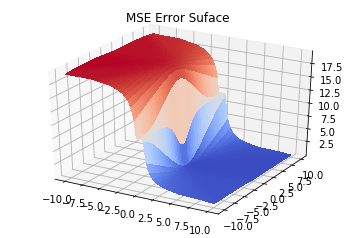

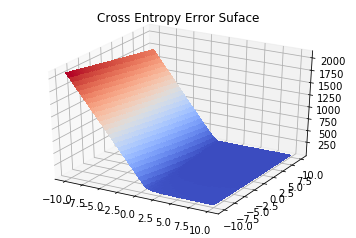

In [15]:
#Error Surface MSE
w = np.linspace(-10,10,num = 1000,dtype = np.float)
b = np.linspace(-10,10,num = 1000,dtype = np.float)
w,b = np.meshgrid(w,b)
mse_list = []
for i in range(w.shape[0]):
    Loss = mse(x,y,w[i],b[i])
    mse_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, mse_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('MSE Error Suface')
plt.show()
#Error Surface Cross Entropy
cross_list = []
for i in range(w.shape[0]):
    Loss = cross_entropy(x,y,w[i],b[i])
    cross_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, cross_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('Cross Entropy Error Suface')
plt.show()